In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_path = "city_data.csv"
ride_path = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)
# Combine the data into a single dataset
city_rides = pd.merge(ride_data, city_data, on="city")
# Display the data table for preview
city_rides.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
plot_data = city_rides.groupby('city').aggregate({'ride_id': 'nunique', 'fare': 'mean', 'type': 'first', 'driver_count': 'first'})

urban_rides = plot_data.loc[plot_data['type']== 'Urban']['ride_id'].values
urban_fares = plot_data.loc[plot_data['type']== 'Urban']['fare'].values
urban_drivers = plot_data.loc[plot_data['type']== 'Urban']['driver_count'].values

suburban_rides = plot_data.loc[plot_data['type']== 'Suburban']['ride_id'].values
suburban_fares = plot_data.loc[plot_data['type']== 'Suburban']['fare'].values
suburban_drivers = plot_data.loc[plot_data['type']== 'Suburban']['driver_count'].values

rural_rides = plot_data.loc[plot_data['type']== 'Rural']['ride_id'].values
rural_fares = plot_data.loc[plot_data['type']== 'Rural']['fare'].values
rural_drivers = plot_data.loc[plot_data['type']== 'Rural']['driver_count'].values

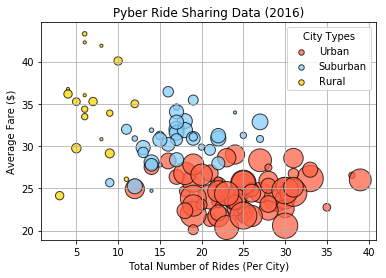

In [39]:
# Build Scatter plot for each city type
urban = plt.scatter(urban_rides, urban_fares, urban_drivers*10, color="tomato", edgecolors='black', alpha=.75)
suburban = plt.scatter(suburban_rides, suburban_fares, suburban_drivers*10, color="lightskyblue", edgecolors='black', alpha=.75)
rural = plt.scatter(rural_rides, rural_fares, rural_drivers*10, color="gold", edgecolors='black', alpha=.75)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend

lgnd = plt.legend((urban, suburban, rural),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10, title="City Types", markerscale=.5)
# Incorporate a text label regarding circle size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.grid(True)

#Save Figure
plt.savefig('PyberData.png')

plt.show()

## Total Fares by City Type

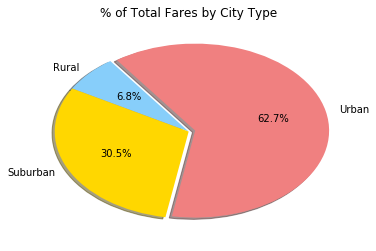

In [36]:
# Calculate Fare Percents
urban_fares_total = city_rides.loc[city_rides['type']== 'Urban']['fare'].sum()
rural_fares_total = city_rides.loc[city_rides['type']== 'Rural']['fare'].sum()
suburban_fares_total = city_rides.loc[city_rides['type']== 'Suburban']['fare'].sum()

all_fares = [urban_fares_total, rural_fares_total, suburban_fares_total]

# Build Pie Chart
city_types = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.05, 0, 0)

plt.title("% of Total Fares by City Type")
plt.pie(all_fares, explode=explode, labels=city_types, colors=colors, autopct="%.1f%%", shadow=True, startangle=260)

#Save Figure
plt.savefig('CityFares.png')
plt.show()

## Total Rides by City Type

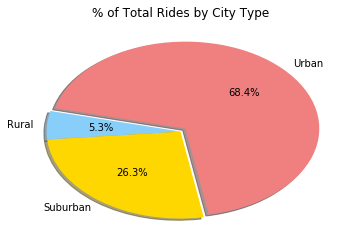

In [37]:
# Calculate Ride Percents
urban_rides_total = city_rides.loc[city_rides['type']== 'Urban']['ride_id'].count()
rural_rides_total = city_rides.loc[city_rides['type']== 'Rural']['ride_id'].count()
suburban_rides_total = city_rides.loc[city_rides['type']== 'Suburban']['ride_id'].count()

all_rides = [urban_rides_total, rural_rides_total, suburban_rides_total]

# Build Pie Chart
city_types = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.05, 0, 0)

plt.title("% of Total Rides by City Type")
plt.pie(all_rides, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)

#Save Figure
plt.savefig('CityRides.png')
plt.show()

## Total Drivers by City Type

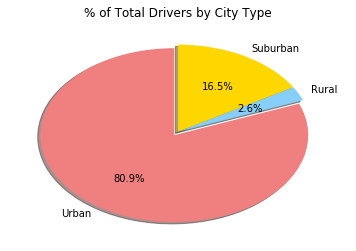

In [41]:
# Calculate Driver Percents
urban_drivers_total = plot_data.loc[plot_data['type']== 'Urban']['driver_count'].sum()
rural_drivers_total = plot_data.loc[plot_data['type']== 'Rural']['driver_count'].sum()
suburban_drivers_total = plot_data.loc[plot_data['type']== 'Suburban']['driver_count'].sum()

all_drivers = [urban_drivers_total, rural_drivers_total, suburban_drivers_total]


# Build Pie Chart
city_types = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.05, 0, 0)

plt.title("% of Total Drivers by City Type")
plt.pie(all_drivers, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Save Figure
plt.savefig('CityDrivers.png')
plt.show()